In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars1=pd.read_csv("archive-4/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
cars1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
cars1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
cars1['year'].describe().to_frame()

,year
count,4340.000000
mean,2013.090783
std,4.215344
min,1992.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2020.000000


In [6]:
cars1['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [7]:
cars=cars1
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [8]:
cars['seller_type']=lbl.fit_transform(cars['seller_type'])

In [9]:
cars['fuel']=cars['fuel'].map({'Petrol':1,'Diesel':2,'CNG':3,'LPG':4,'Electric':5})

In [10]:
cars['km_driven'].describe()

count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

In [11]:
kms=[]
for i in cars.km_driven:
    if i<=100000:
        kms.append(1)
    elif i>=400000:
        kms.append(3)
    else:
        kms.append(2)
cars['Kms Driven']=kms

In [12]:
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Kms Driven
0,Maruti 800 AC,2007,60000,70000,1,1,Manual,First Owner,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,Manual,First Owner,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,Manual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,Manual,First Owner,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,Manual,Second Owner,2


In [13]:
cars['selling_price'].describe()

count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

In [14]:
cars['transmission']=cars['transmission'].map({'Manual':1,'Automatic':2})

In [15]:
cars.year.value_counts().sort_index()

1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: year, dtype: int64

In [16]:
cars['owner']=cars['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

In [17]:
sp=[]
for j in cars.selling_price:
    if j<=500000:
        sp.append(1)
    elif j>=2000000:
        sp.append(3)
    else:
        sp.append(2)
cars['sprice']=sp
yyear=[]
for m in cars.year:
    if m<=2001:
        yyear.append(1)
    elif m>=2011:
        yyear.append(3)
    else:
        yyear.append(2)
cars['YYYY']=yyear

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)

In [19]:
x=pd.DataFrame()
x=cars

In [20]:
x

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Kms Driven,sprice,YYYY
0,Maruti 800 AC,2007,60000,70000,1,1,1,1,1,1,2
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,1,1,1,2
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,1,1,1,2,3
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,1,1,1,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,1,2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,1,1,2,1,1,3
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,1,1,2,1,1,3
4337,Maruti 800 AC BSIII,2009,110000,83000,1,1,1,2,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,1,1,1,1,2,3


In [21]:
x=x.drop(columns={'selling_price','name','km_driven','year'})

In [22]:
x.head()

,fuel,seller_type,transmission,owner,Kms Driven,sprice,YYYY
0,1,1,1,1,1,1,2
1,1,1,1,1,1,1,2
2,2,1,1,1,1,2,3
3,1,1,1,1,1,1,3
4,2,1,1,2,2,1,3


In [23]:
y=pd.DataFrame()
y['Year']=x['YYYY']

In [24]:
x=x.drop(columns={'YYYY'})

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
rf.fit(x_train,np.ravel(y_train))

RandomForestClassifier(n_estimators=500)

In [27]:
y_pred=rf.predict(x_test)

In [28]:
rf.score(x_test,np.ravel(y_test))

0.8087557603686636

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accscore=accuracy_score(y_test,y_pred)
accscore

0.8087557603686636

In [32]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
score3=cross_val_score(rf,x,np.ravel(y),cv=StratifiedKFold(n_splits=5))
print(sum(score3)/len(score3))

0.8013824884792626


In [33]:
b=pd.DataFrame()
b=cars
feature_importance=pd.DataFrame({'RF':rf.feature_importances_},index=b.drop(columns=['name','selling_price','km_driven','sprice','year']).columns)
feature_importance.sort_values(by='RF',ascending=True,inplace=True)
feature_importance

,RF
transmission,0.029808
seller_type,0.052833
Kms Driven,0.102333
fuel,0.154818
YYYY,0.287888
owner,0.372320


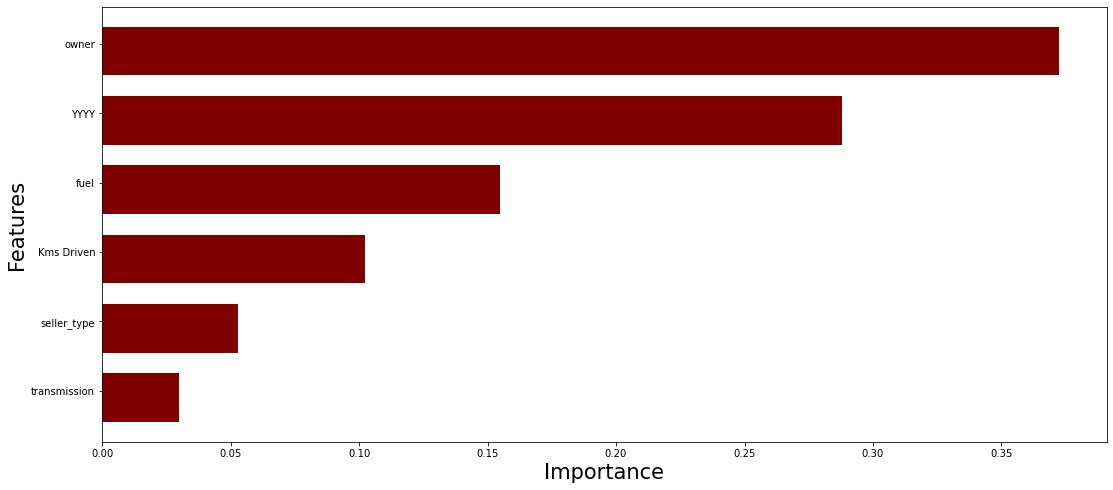

In [34]:
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['RF'],0.7,color='maroon')
plt.xlabel('Importance',fontsize=21)
plt.ylabel('Features',fontsize=21)
ax.set(yticks=index+0.1,yticklabels=feature_importance.index)
plt.show()

In [35]:
x1=cars1

In [36]:
x1.drop(columns={'YYYY'})

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Kms Driven,sprice
0,Maruti 800 AC,2007,60000,70000,1,1,1,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,1,1,1,2
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,1,1,2,1,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,1,1,2,1,1
4337,Maruti 800 AC BSIII,2009,110000,83000,1,1,1,2,1,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,1,1,1,1,2


In [37]:
x1['Curyear']=2022

In [38]:
x1['carage']=x1['Curyear']-x1['year']

In [39]:
x1=x1.drop(columns={'year','YYYY','Curyear'})

In [40]:
x1.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Kms Driven,sprice,carage
selling_price,1.000000,-0.192289,0.226883,-0.151554,0.530205,-0.198833,-0.109840,0.754001,-0.413922
km_driven,-0.192289,1.000000,0.274760,0.113689,-0.120226,0.274409,0.732854,-0.222719,0.419688
fuel,0.226883,0.274760,1.000000,-0.029301,0.027507,0.015318,0.199216,0.236676,-0.090388
seller_type,-0.151554,0.113689,-0.029301,1.000000,-0.174925,0.139961,0.109526,-0.099266,0.098352
transmission,0.530205,-0.120226,0.027507,-0.174925,1.000000,-0.083924,-0.070096,0.405490,-0.143800
owner,-0.198833,0.274409,0.015318,0.139961,-0.083924,1.000000,0.200879,-0.235309,0.410448
Kms Driven,-0.109840,0.732854,0.199216,0.109526,-0.070096,0.200879,1.000000,-0.140680,0.253428
sprice,0.754001,-0.222719,0.236676,-0.099266,0.405490,-0.235309,-0.140680,1.000000,-0.480383
carage,-0.413922,0.419688,-0.090388,0.098352,-0.143800,0.410448,0.253428,-0.480383,1.000000


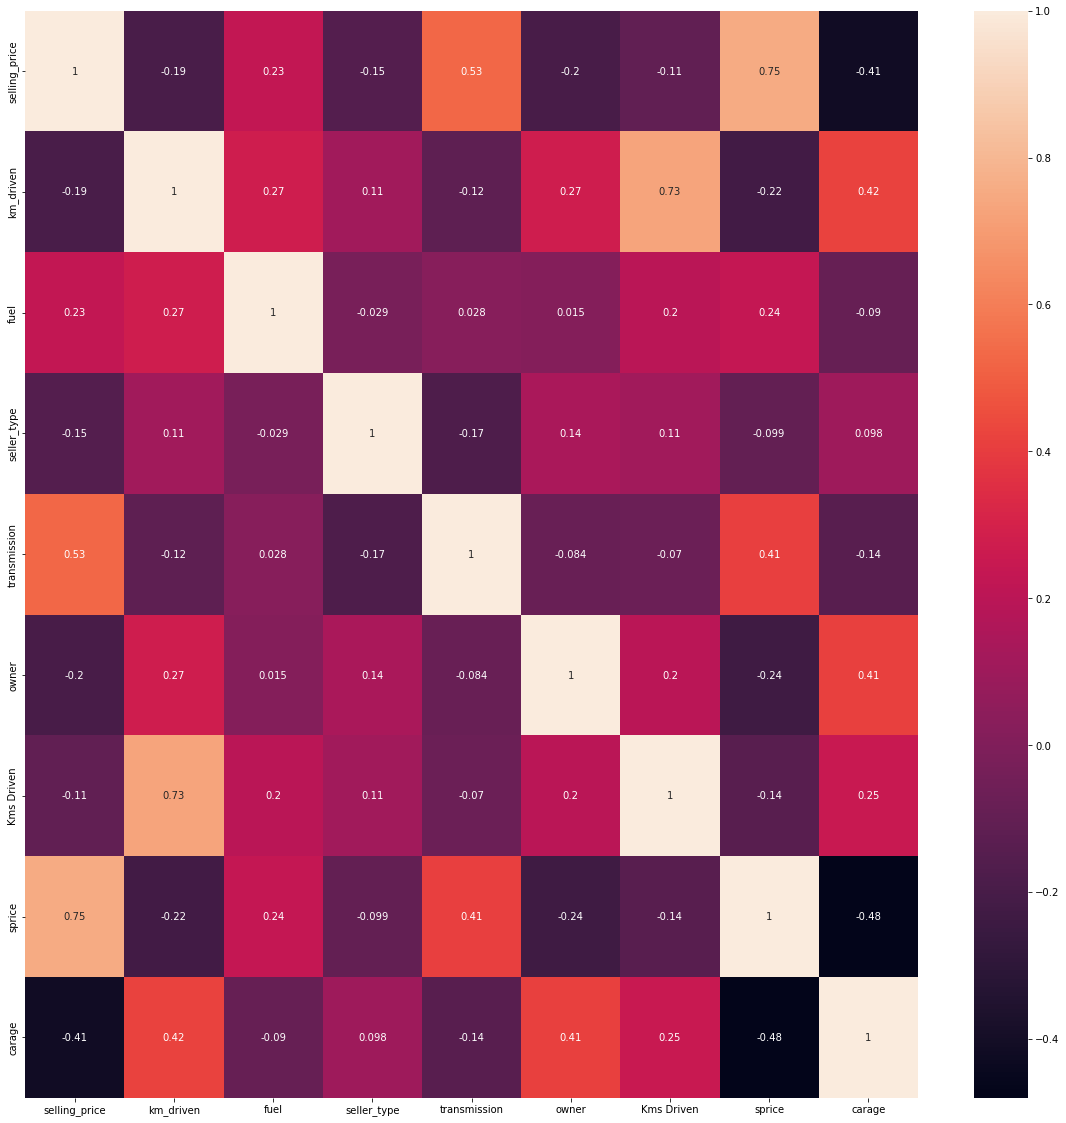

In [41]:
import seaborn as sns
corrmat=x1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x1[top_corr_features].corr(),annot=True)

In [42]:
y1=cars1['selling_price']

In [43]:
x1

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Kms Driven,sprice,carage
0,Maruti 800 AC,60000,70000,1,1,1,1,1,1,15
1,Maruti Wagon R LXI Minor,135000,50000,1,1,1,1,1,1,15
2,Hyundai Verna 1.6 SX,600000,100000,2,1,1,1,1,2,10
3,Datsun RediGO T Option,250000,46000,1,1,1,1,1,1,5
4,Honda Amaze VX i-DTEC,450000,141000,2,1,1,2,2,1,8
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,2,1,1,2,1,1,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,2,1,1,2,1,1,8
4337,Maruti 800 AC BSIII,110000,83000,1,1,1,2,1,1,13
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,2,1,1,1,1,2,6


In [44]:
x1=x1.drop(columns={'name','selling_price','Kms Driven','sprice'})

In [46]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=2)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor(n_estimators=500,max_depth=10,max_features=5)
rr.fit(x1_train,y1_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=500)

In [48]:
train_acc=rr.score(x1_train,y1_train)
test_acc=rr.score(x1_test,y1_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  88.35 %
Testing Accuracy:  73.0 %
